In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1SytFlvG0AOqweAVLZKj9_JtwhEh3k4F3'}) # replace the id with id of file you want to access
downloaded.GetContentFile('dataset.csv')

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go

import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score,mean_squared_error
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

In [ ]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:

heart=pd.read_csv('dataset.csv')

In [ ]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(heart.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [ ]:
heart['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:

heart.groupby('target').size()

target
0    138
1    165
dtype: int64

In [ ]:
heart.groupby('target').sum()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,7811,114,66,18547,34650,22,62,19196,76,218.8,161,161,351
1,8662,93,227,21335,39968,23,98,26147,23,96.2,263,60,350


In [ ]:

heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


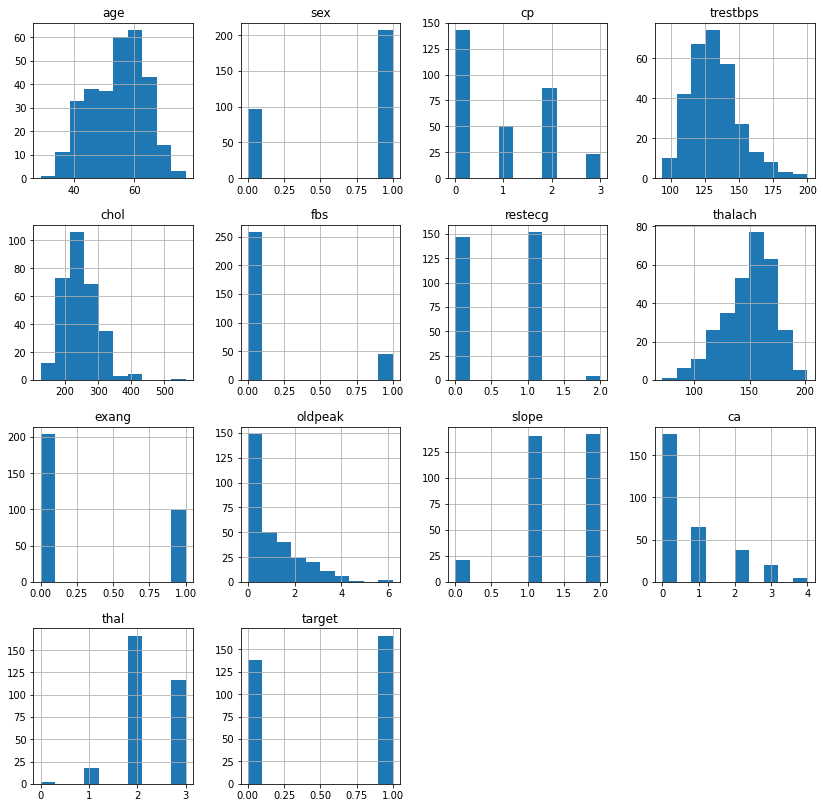

In [ ]:
heart.hist(figsize=(14,14))
plt.show()

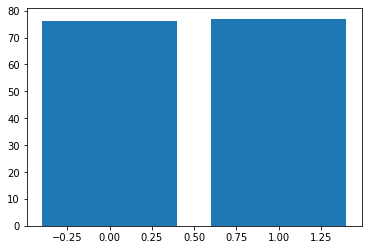

In [ ]:
plt.bar(x=heart['sex'],height=heart['age'])
plt.show()

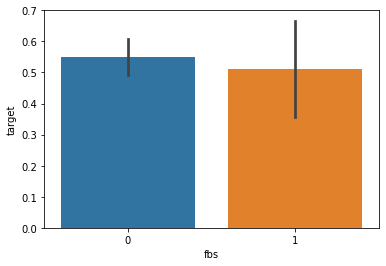

In [ ]:
sns.barplot(x="fbs", y="target", data=heart)
plt.show()

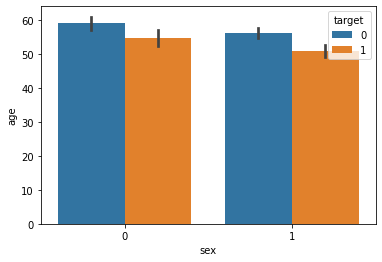

In [ ]:

sns.barplot(x=heart['sex'],y=heart['age'],hue=heart['target'])

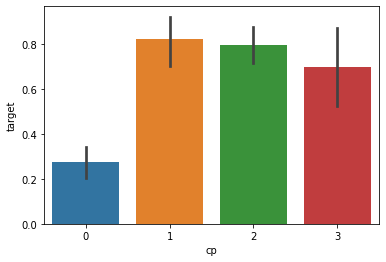

In [ ]:
sns.barplot(heart["cp"],heart['target'])

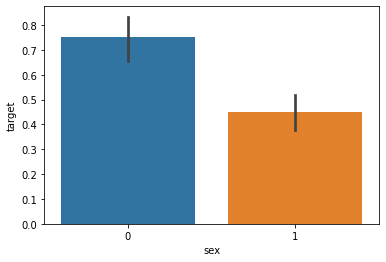

In [ ]:
sns.barplot(heart["sex"],heart['target'])

In [ ]:
px.bar(heart,heart['sex'],heart['target'])

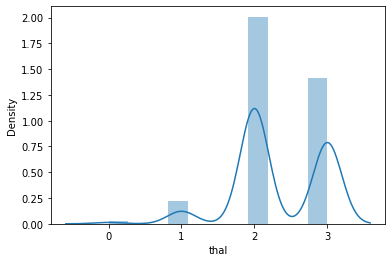

In [ ]:
sns.distplot(heart["thal"])

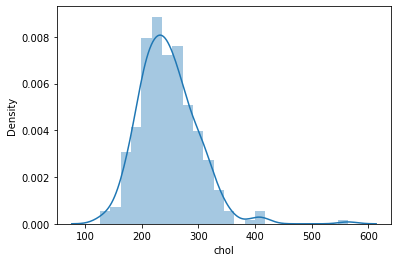

In [ ]:
sns.distplot(heart["chol"])

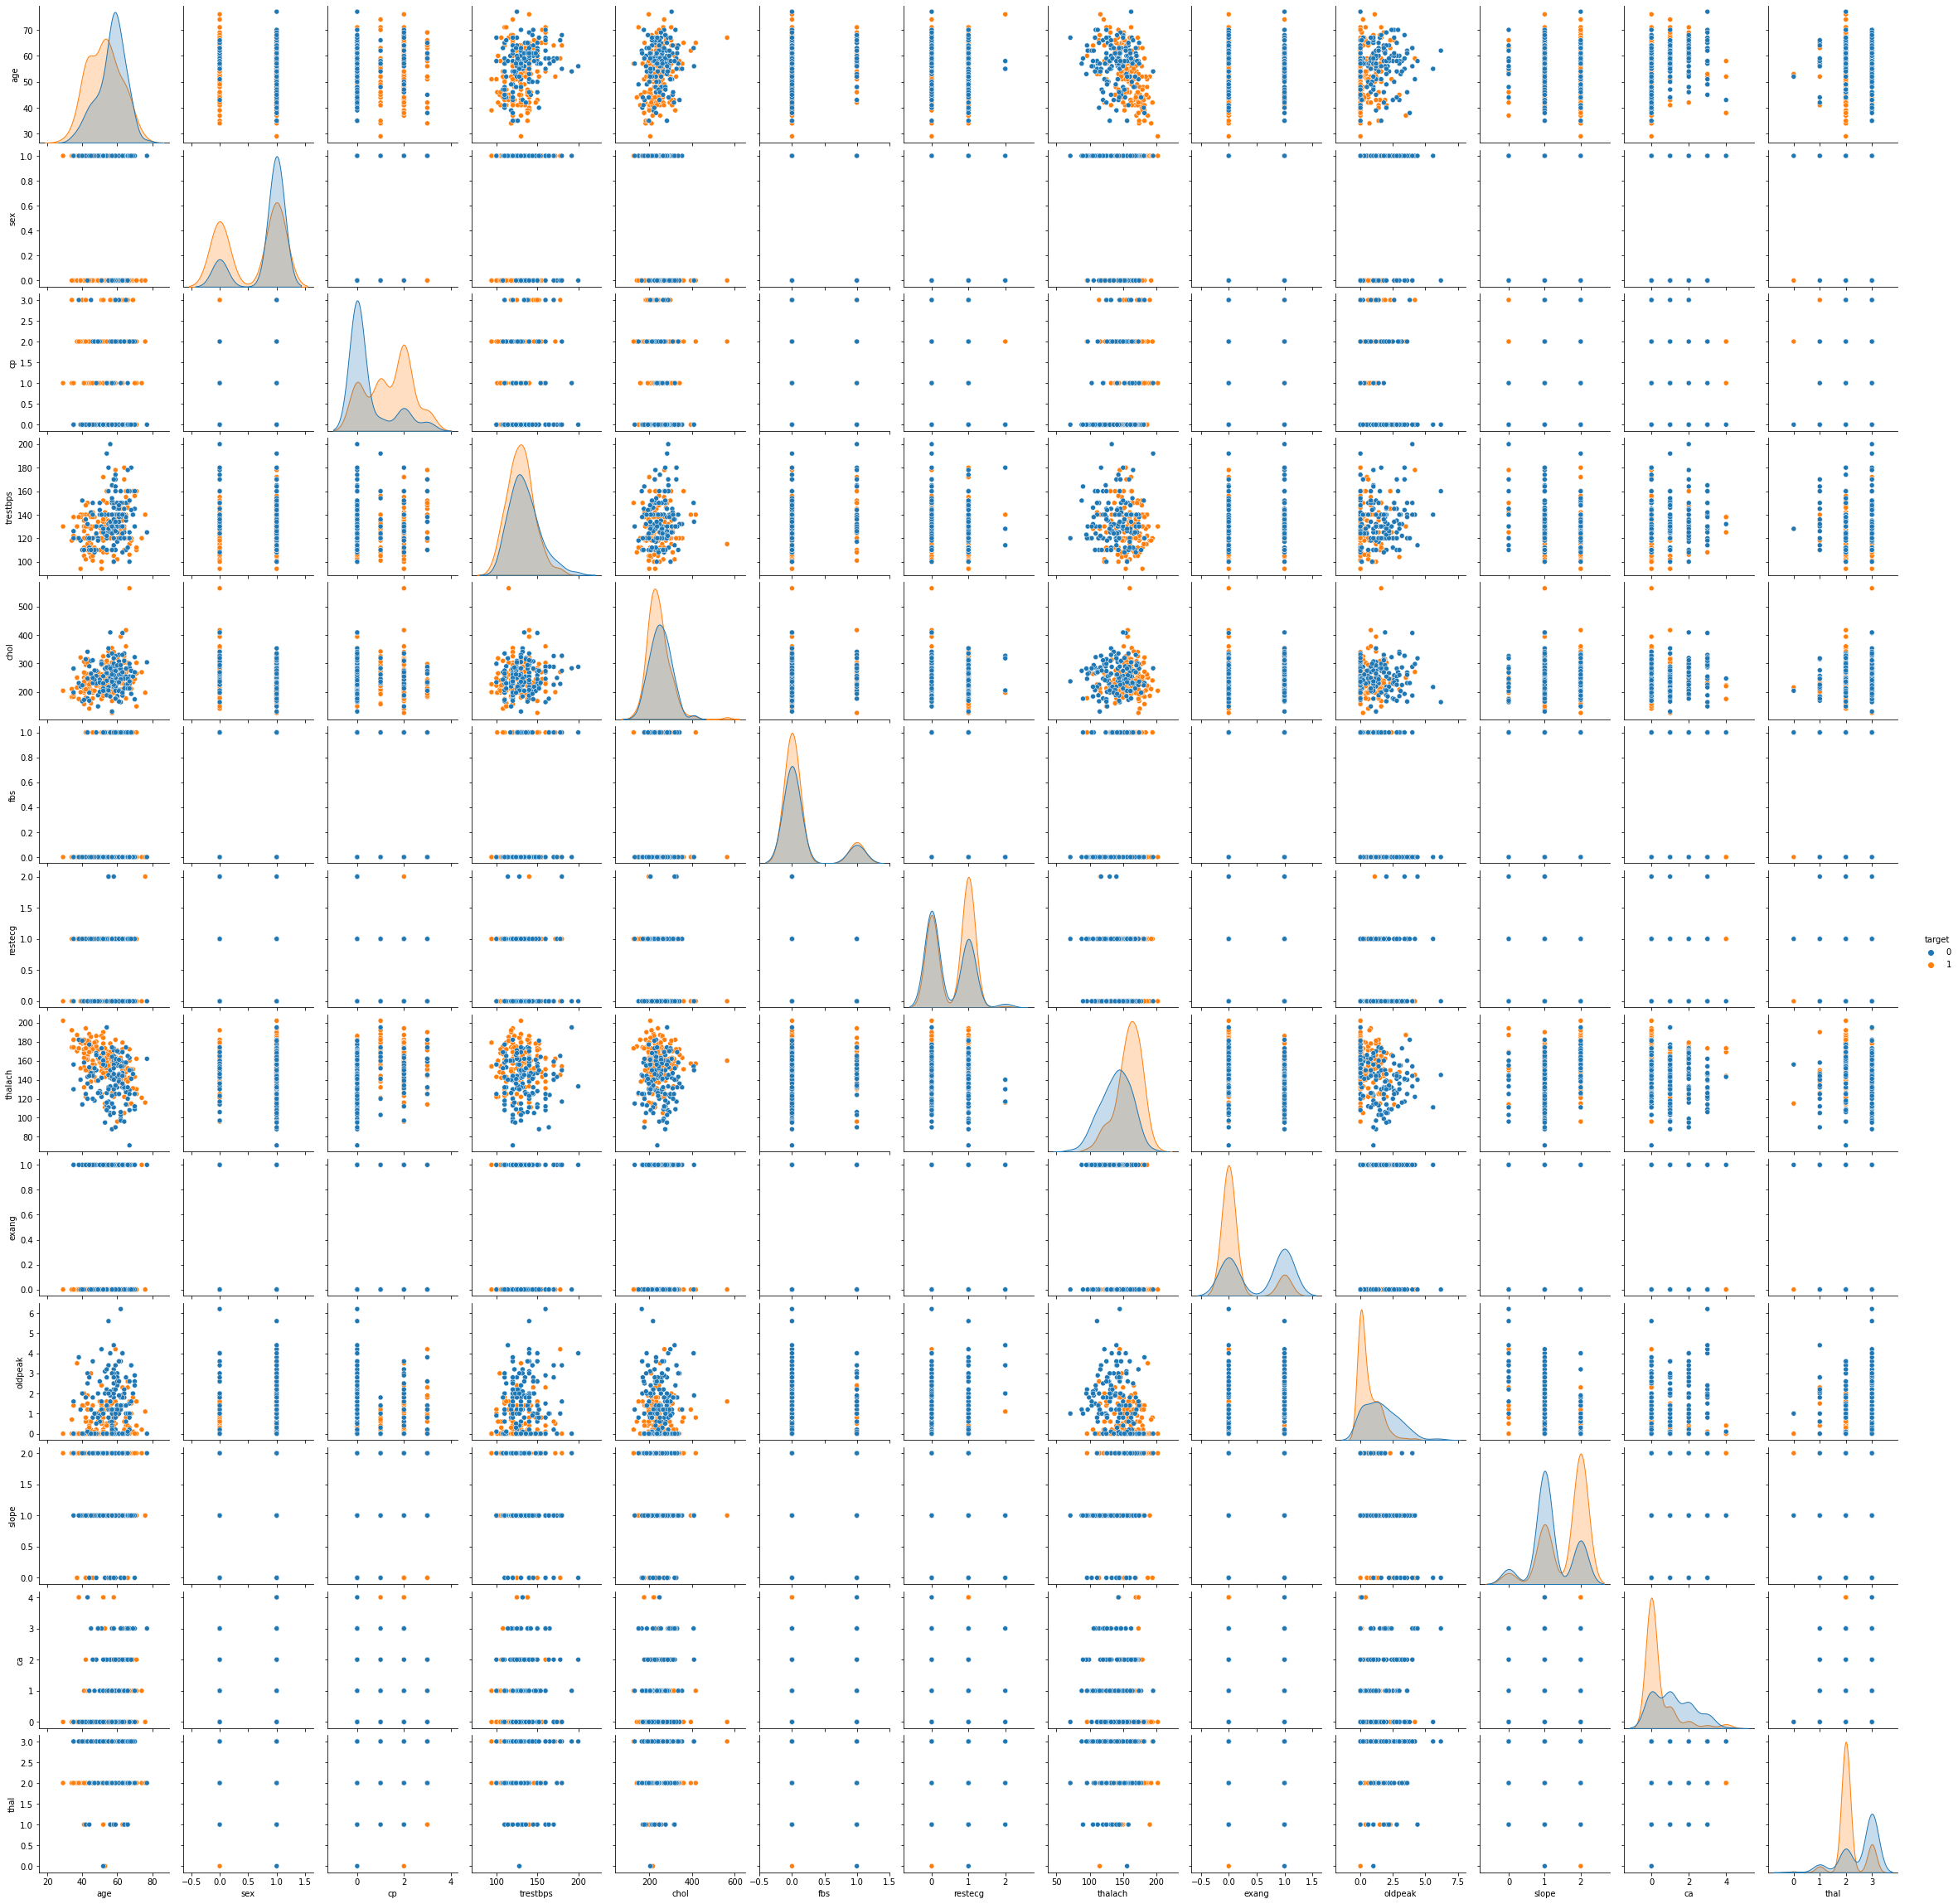

In [ ]:
sns.pairplot(heart,hue='target')

In [ ]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
numeric_columns=['trestbps','chol','thalach','age','oldpeak']

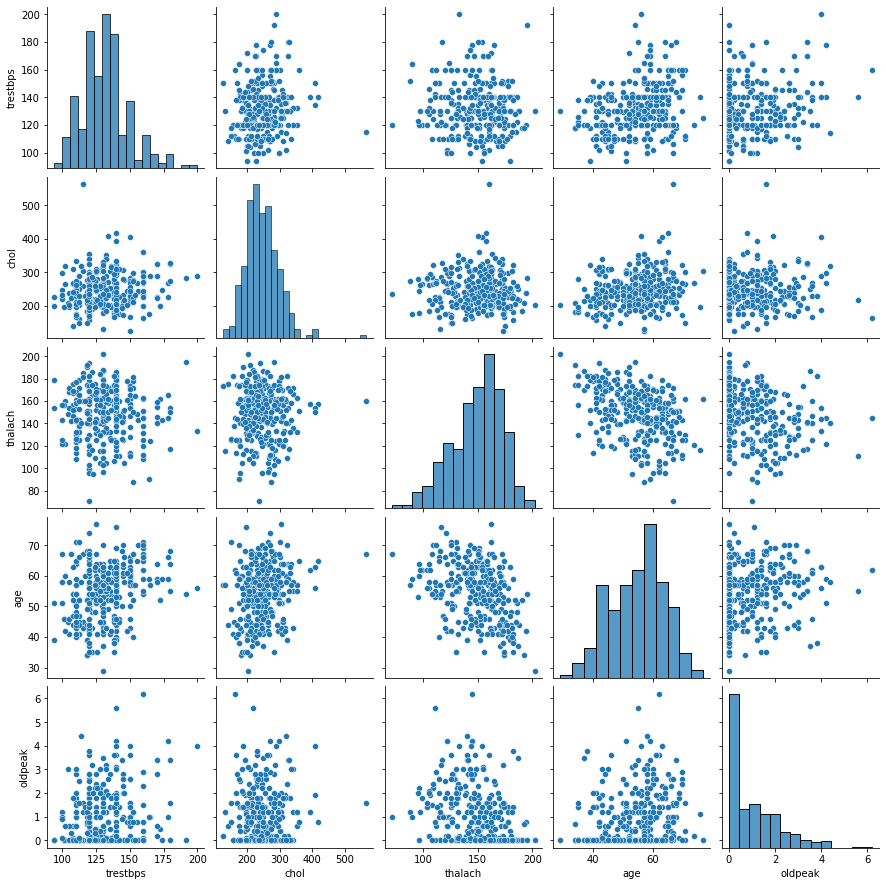

In [ ]:
sns.pairplot(heart[numeric_columns])

1    165
0    138
Name: target, dtype: int64


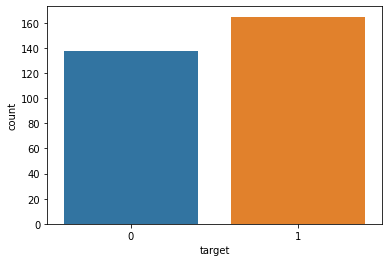

In [ ]:

y = heart["target"]

sns.countplot(y)

target_temp = heart.target.value_counts()

print(target_temp)

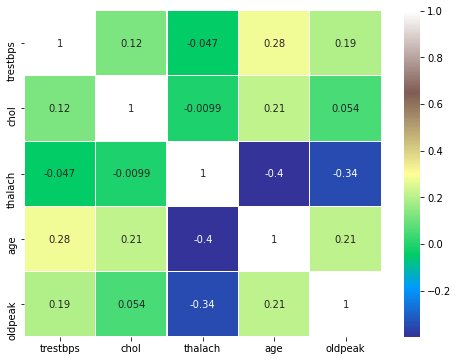

In [ ]:
sns.heatmap(heart[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

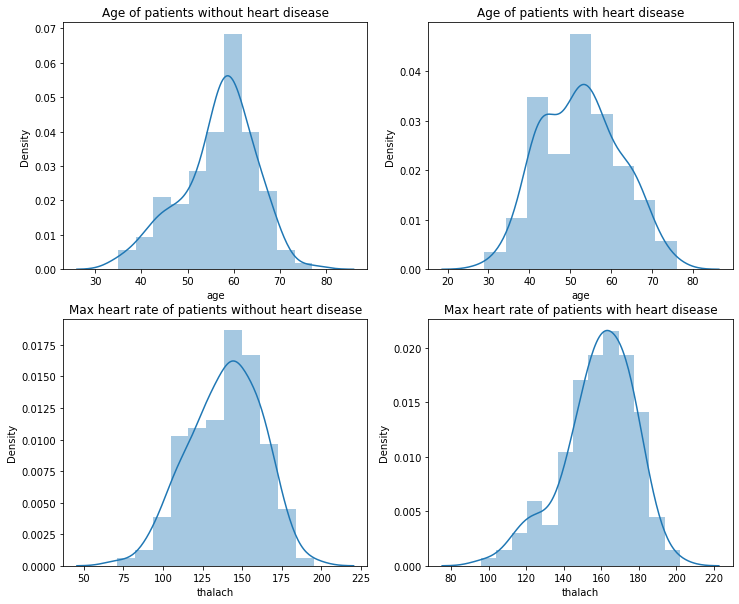

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(heart[heart['target']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(222)
sns.distplot(heart[heart['target']==1].age)
plt.title('Age of patients with heart disease')
plt.subplot(223)
sns.distplot(heart[heart['target']==0].thalach )
plt.title('Max heart rate of patients without heart disease')
plt.subplot(224)
sns.distplot(heart[heart['target']==1].thalach )
plt.title('Max heart rate of patients with heart disease')
plt.show()

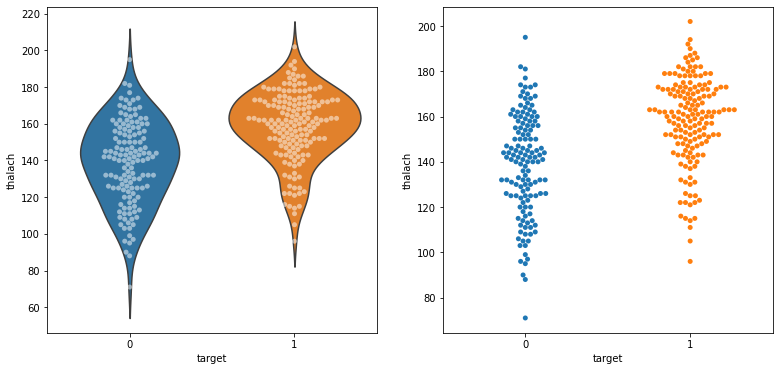

In [ ]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.violinplot(x="target", y="thalach", data=heart, inner=None)
sns.swarmplot(x="target", y="thalach", data=heart, color='w', alpha=0.5)


plt.subplot(122)
sns.swarmplot(x="target", y="thalach", data=heart)
plt.show()

In [ ]:

heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


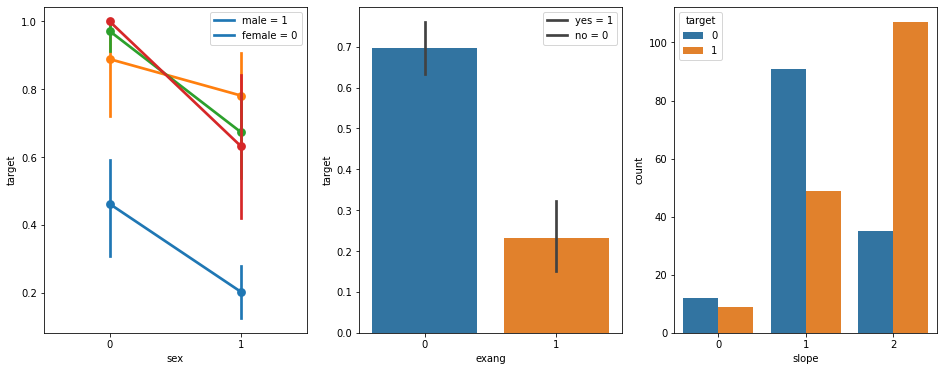

In [ ]:
# create pairplot and two barplots
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="sex", y="target", hue='cp', data=heart)
plt.legend(['male = 1', 'female = 0'])
plt.subplot(132)
sns.barplot(x="exang", y="target", data=heart)
plt.legend(['yes = 1', 'no = 0'])
plt.subplot(133)
sns.countplot(x="slope", hue='target', data=heart)
plt.show()

In [ ]:

heart['target'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Name: target, Length: 303, dtype: bool

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X,y=heart,heart.target

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)

In [ ]:
X_test

array([[ 0.18017482, -1.46841752, -0.93851463, ...,  1.24459328,
         1.12302895, -1.09345881],
       [ 0.40075247,  0.68100522,  1.00257707, ...,  0.26508221,
         1.12302895, -1.09345881],
       [ 1.06248543,  0.68100522,  1.00257707, ..., -0.71442887,
         1.12302895, -1.09345881],
       ...,
       [ 0.29046364,  0.68100522,  1.00257707, ...,  0.26508221,
         1.12302895, -1.09345881],
       [-0.26098049,  0.68100522,  0.03203122, ..., -0.71442887,
        -0.51292188,  0.91452919],
       [ 0.62133012,  0.68100522, -0.93851463, ...,  1.24459328,
         1.12302895, -1.09345881]])

In [ ]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [ ]:
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (212, 14)
train_set_y shape: (212,)
test_set_x shape: (91, 14)
test_set_y shape: (91,)


In [ ]:
Catagory=['No....you donot have probability for disease  ...','Yes you have Heart Disease....']

In [ ]:
prediction=dt.predict(X_test)
accuracy_dt=accuracy_score(y_test,prediction)*100

In [ ]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [ ]:
prediction

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0])

In [ ]:
X_DT=np.array([[63 ,1,1,1,233,143,1,0,150,0,2.3,0,0,1]])
X_DT_prediction=dt.predict(X_DT)

In [ ]:
X_DT_prediction[0]

1

<h1>K Nearest Neighbour

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k_range=range(1,26)
scores={}
h_score = 0       # to find the best score
best_k=0          # to find the best k
scores_list=[]  

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction_knn=knn.predict(X_test)
    scores[k]=accuracy_score(y_test,prediction_knn)
    if scores[k]>h_score:
        h_score = scores[k]
        best_k = k

    scores_list.append(accuracy_score(y_test,prediction_knn))
print('The best value of k is {} with score : {}'.format(best_k,h_score))

The best value of k is 6 with score : 0.978021978021978


In [ ]:

knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [ ]:
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [ ]:

prediction_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100
print('accuracy_score score     : ',accuracy_score(y_test,prediction_knn)*100,'%')
print('mean_squared_error score : ',mean_squared_error(y_test,prediction_knn)*100,'%')

accuracy_score score     :  97.8021978021978 %
mean_squared_error score :  2.197802197802198 %


In [ ]:
scores_dict['KNeighborsClassifier'] = accuracy_knn
accuracy_knn

97.8021978021978

In [ ]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.972
Accuracy on test set: 0.978


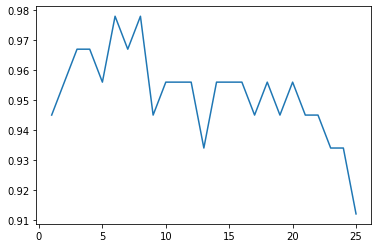

In [ ]:
plt.plot(k_range,scores_list)

In [ ]:
px.line(x=k_range,y=scores_list)

In [ ]:
X_knn=np.array([[63 ,1,2, 3,145,233,1,0,150,0,2.3,0,0,1]])
X_knn=sc.transform(X_knn)
X_knn_prediction=dt.predict(X_knn)

In [ ]:
X_knn

array([[  0.9521966 ,   0.68100522,   1.00257707,  -7.34607655,
         -1.95697615, 654.79526595,   0.89896224,  -6.54413295,
        319.12012013,  -0.89686172,   1.46399175,  -0.71442887,
         -3.78482354,   0.91452919]])

In [ ]:
(X_knn_prediction[0])

1

In [ ]:
print(Catagory[int(X_knn_prediction[0])])

Yes you have Heart Disease....


In [ ]:
X_knn=np.array([[57 ,0,0, 0,140,241,0,1,123,1,0.2,1,0,0]])
X_knn=sc.transform(X_knn)
X_knn_prediction=dt.predict(X_knn)

In [ ]:
X_knn

array([[ 2.90463642e-01, -1.46841752e+00, -9.38514634e-01,
        -7.51741526e+00, -2.05360356e+00,  6.77291846e+02,
        -1.00583187e+00, -6.50040245e+00,  2.61553105e+02,
        -3.41661606e-02, -1.94948553e+00,  2.65082205e-01,
        -3.78482354e+00, -1.09345881e+00]])

In [ ]:
(X_knn_prediction[0])

0

In [ ]:
print(Catagory[int(X_knn_prediction[0])])

No....you donot have probability for disease  ...
